# <center>START</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bees=pd.read_csv('intro_bees.csv',sep=',')

In [3]:
bees.head()

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL


# Basic Data Analysis

All data is taken from Survey process

In [4]:
bees.Program.unique()

array(['SURVEY'], dtype=object)

Data is collected from past 5 years from 15 to 19

In [5]:
bees.Year.unique()

array([2019, 2018, 2017, 2016, 2015], dtype=int64)

Data is collected in 4 quaters of year

In [6]:
bees.Period.unique()

array(['JAN THRU MAR', 'APR THRU JUN', 'JUL THRU SEP', 'OCT THRU DEC'],
      dtype=object)

# <center> United States Map </center>

<img href="1125px-Map_of_USA_with_state_names.svg.png"></img>

<img src="1125px-Map_of_USA_with_state_names.svg.png"></img>

In [7]:
bees.State.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [8]:
bees.state_code.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'HI', 'ID', 'IL',
       'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
       'MO', 'MT', 'NE', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
       'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',
       'WY'], dtype=object)

State and state_code are the same thing

We have collected the data from 45 states. 

In [9]:
bees.State.value_counts()

Hawaii            102
New York          102
Utah              102
Montana           102
New Mexico        102
Missouri          102
Michigan          102
Florida           102
Arkansas          102
Maryland          102
Oregon            102
Washington        102
Tennessee         102
Colorado          102
Connecticut       102
Arizona           102
Alabama           102
Minnesota         102
Nebraska          102
Massachusetts     102
Oklahoma          102
California        102
Kentucky          102
Ohio              102
Virginia          102
Iowa              102
South Dakota      102
Wyoming           102
West Virginia     102
Mississippi       102
Georgia           102
Louisiana         102
Indiana           102
Vermont           102
Illinois          102
Maine             102
Texas             102
Idaho             102
Wisconsin         102
North Dakota      102
North Carolina    102
Pennsylvania      102
New Jersey        102
Kansas            102
South Carolina    102
Name: Stat

Data looks perfectly balanced in terms of States.This will help us analyzing the impact of various factors on bees equally on every state

In [10]:
bees["Affected by"].unique()

array(['Disease', 'Other', 'Pesticides', 'Pests_excl_Varroa', 'Unknown',
       'Varroa_mites'], dtype=object)

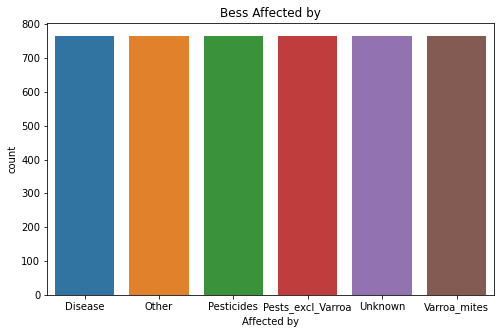

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=bees ,x="Affected by")
plt.title("Bess Affected by")
plt.show()

Again quite balanced subset of data is taken , we have equal no.of rows for every factor which has affected the bee lives in United States

<AxesSubplot:ylabel='Pct of Colonies Impacted'>

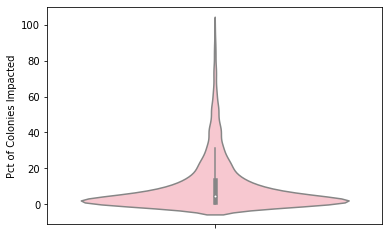

In [12]:
sns.violinplot(y=bees['Pct of Colonies Impacted'],scale="count",color="pink")

Impact on bee colonies is majorly beetween 0-40%. It will be intresting to see in which area bees hives are being impacted more than 40% mark.

# Lets move on to some detailed analysis 

## 1) Year as Primary Column

We have 4 years data divied into 4 quarters each.Lets analyze the data quarter by quarter first

In [13]:
def quarter_by_analysis(data,yr,x_col,y_col):
    df=data[data.Year==yr]
    values=df[y_col].values
    clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
    g=sns.FacetGrid(df,col="Period",col_wrap=2,height=4,aspect=2)
    g.map_dataframe(sns.barplot,y_col,x_col,palette=clrs)
    plt.subplots_adjust(top=0.9)
    plt.ylim(0,50)
    g.fig.suptitle(yr,fontsize=30)

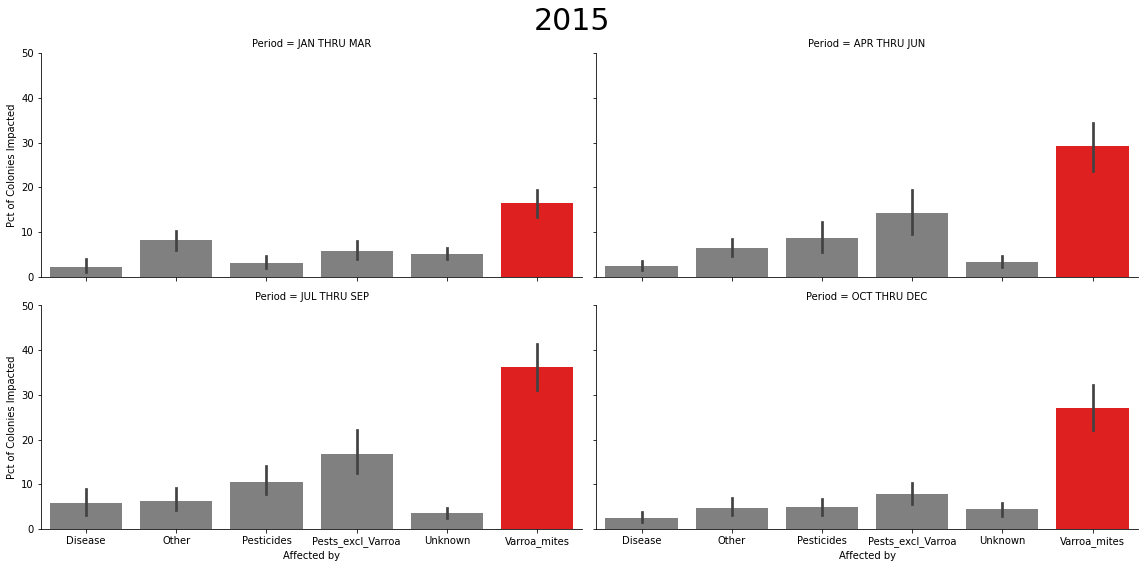

In [14]:
quarter_by_analysis(bees,2015,"Pct of Colonies Impacted","Affected by")

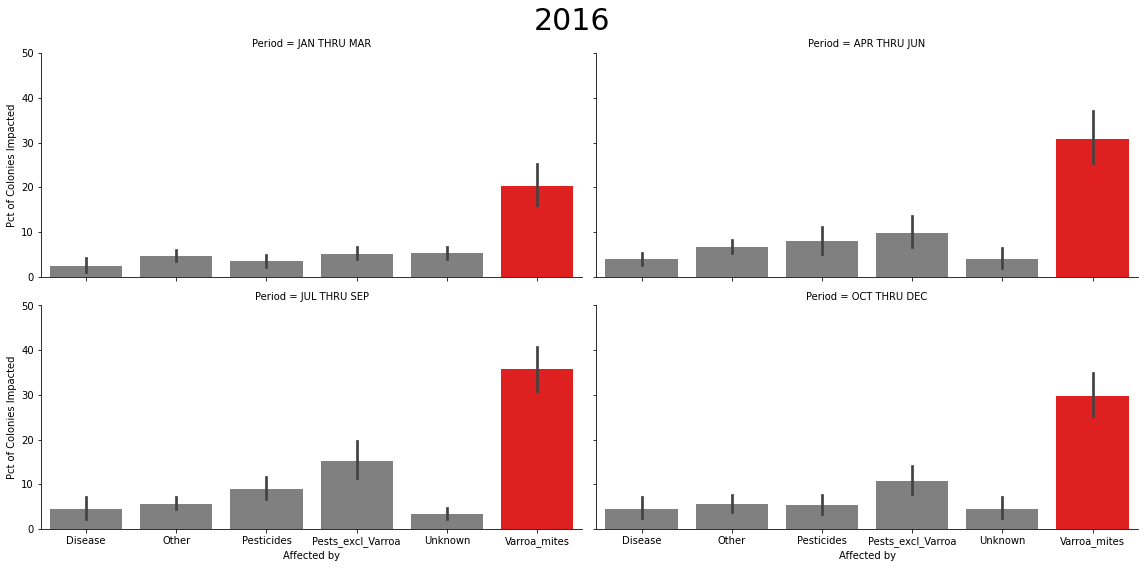

In [15]:
quarter_by_analysis(bees,2016,"Pct of Colonies Impacted","Affected by")

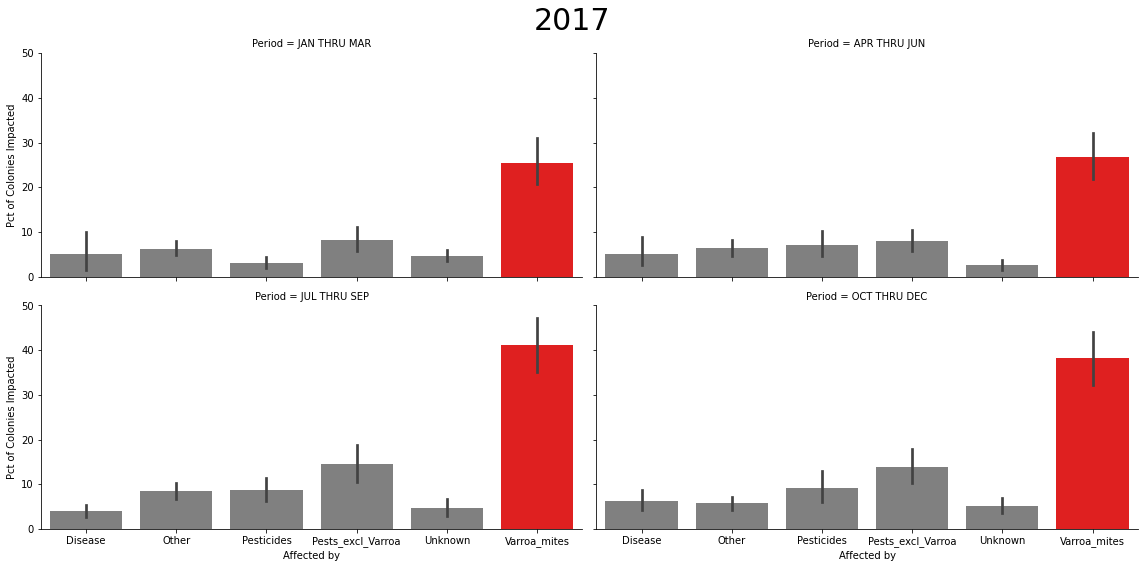

In [16]:
quarter_by_analysis(bees,2017,"Pct of Colonies Impacted","Affected by")

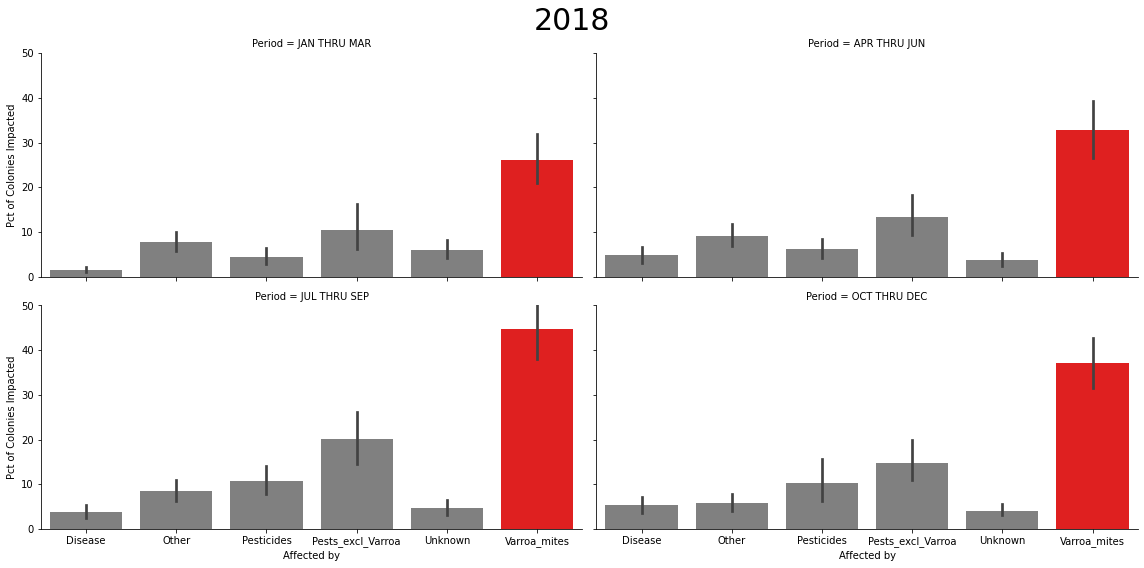

In [17]:
quarter_by_analysis(bees,2018,"Pct of Colonies Impacted","Affected by")

### Varroa-mites has been one of the major impacts on lives of bees in every quarter of the year.
### Months of Jul-Sept were the deadliest for bees, reason being the heat in these months

<Figure size 576x360 with 0 Axes>

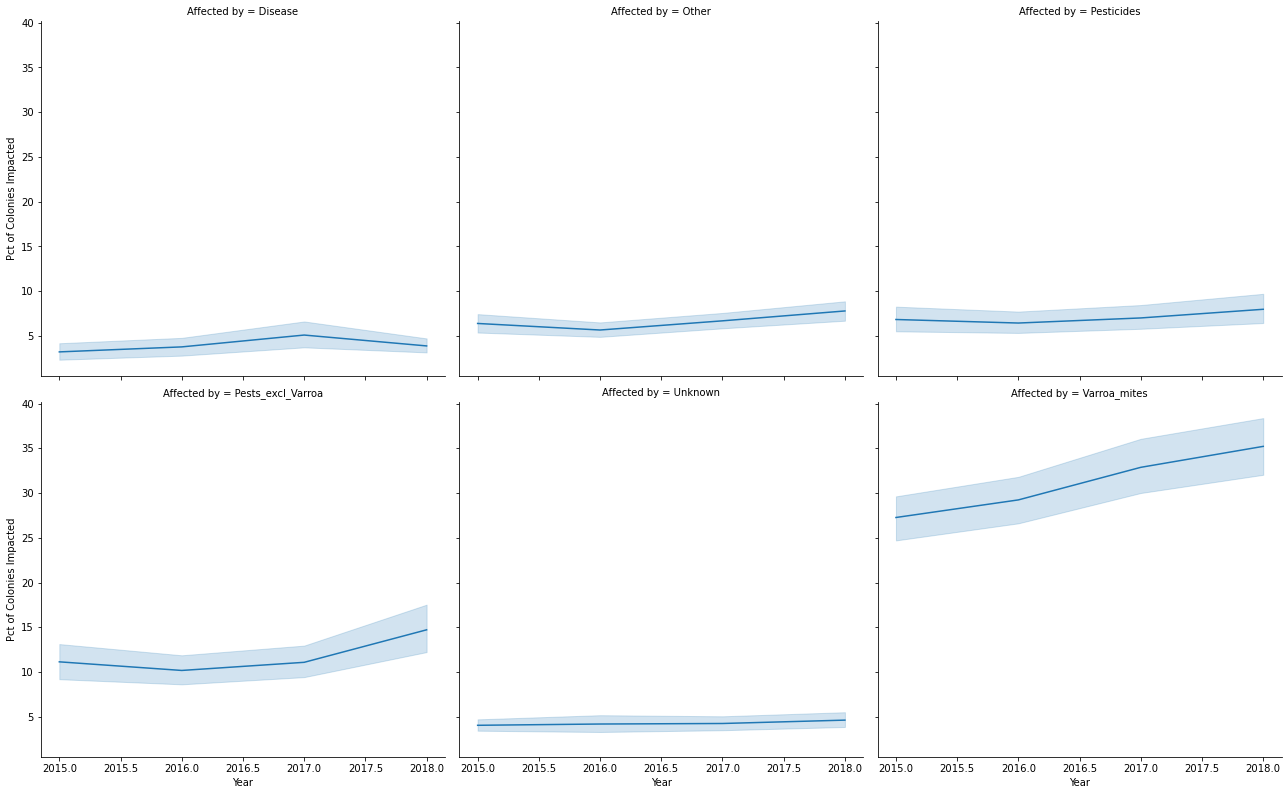

In [18]:
plt.figure(figsize=(8,5))
g=sns.FacetGrid(bees[bees.Year!=2019],col="Affected by",col_wrap=3,aspect=1,height=6) 
g.map_dataframe(sns.lineplot,"Year","Pct of Colonies Impacted") 
plt.subplots_adjust(top=0.9)

Text(0.5, 1.0, 'Overall Trend of past years')

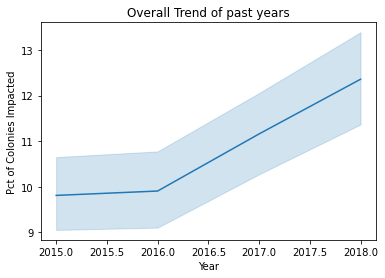

In [19]:
sns.lineplot(x='Year',y='Pct of Colonies Impacted',data=bees[bees['Year']!=2019])
plt.title("Overall Trend of past years")

## A sharp increase from 2016 to 2018. 

### We have exlucded the data for 2019 in above representation becuase we have partial data of year 2019 which can have wrong interpreting results since we are analysing the entire year

# 2) State as primary column

In [20]:
# Lets analyse this data as per various states 

In [21]:
def affected_by_states(data,state):
    df=data[data['State']==state]
    values=df['State'].values
    plt.figure(figsize=(8,5))
    sns.barplot(data=df,x="Affected by",y="Pct of Colonies Impacted")
    plt.title("State:"+state)
    plt.ylim(0,100)

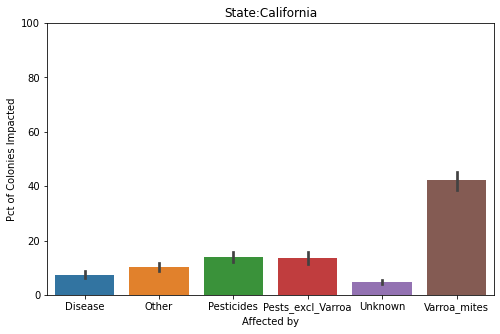

In [22]:
affected_by_states(bees,"California")
plt.savefig("california.png")

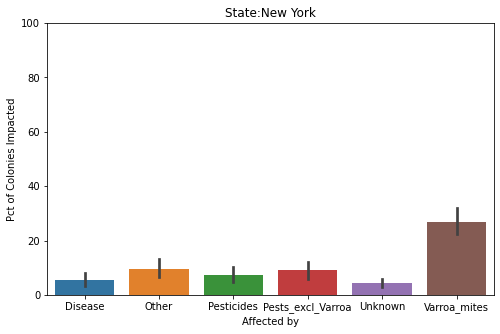

In [23]:
affected_by_states(bees,"New York")

By using above function one can analyze about any state. It tells us which factor was most responsible for impact on bee colonies.

Top reason for the death of bees across all states is Varroa Mites.So it really does not tell us much how different conditions of various states are affecting the bees. So we try to take a look on the 2nd most impactful reason for death of bees.

In [24]:
state_big_impact=pd.DataFrame(bees[['State','Affected by','Pct of Colonies Impacted']].groupby(['State','Affected by'])['Pct of Colonies Impacted'].mean().reset_index())
states=pd.DataFrame(columns=['State','Affected by','Pct of Colonies Impacted'])
for s in state_big_impact.State.unique():
    states=pd.concat([state_big_impact[state_big_impact['State']==s].sort_values('Pct of Colonies Impacted',ascending=False)[1:2],states],axis=0)

| <h2>2nd most impactful reason after Varroa Mites</h2> | <h2>States</h2> | 
| --- | --- |
|<h3> Pests Excl Varroa </h3> | <h4> Virginia, Texas, Tennessee, South Carolina<br>, Pennsylvania,Oregon, Oklahoma,Ohio,<br> North Dakota, North Carolina,New Jersey,<br> Montana, Missouri, Mississippi,Michigan<br>, Massachusetts, Louisiana, Kentucky,<br> Kansas, Illinois,Idaho, Hawaii,<br> Georgia, Florida, Arizona, Alabama </h4>|
|<h3> Pesticides</h3> |<h4> Wisconsin, Vermont, Utah, Nebraska,<br> Minnesota, Maine, Indiana, California, Arkansas </h4>|
|<h3> Other</h3> | <h4> Wyoming, West Virginia, Washington, South Dakota,<br> New York, Maryland, Iowa, Connecticut, Colorado</h4>|
|<h3> Disease</h3> |<h4> New Mexico </h4> |

## Lets calulate top states where bees are affected the most

In [25]:
top_states=pd.DataFrame(bees.groupby('State')["Pct of Colonies Impacted"].mean().sort_values(ascending=False)).reset_index().head(10)

In [26]:
pd.DataFrame(bees.groupby('State')["Pct of Colonies Impacted"].mean().sort_values(ascending=False)).reset_index().tail(5)

,State,Pct of Colonies Impacted
40,Wyoming,6.066667
41,Nebraska,5.961765
42,New Jersey,5.740196
43,Maryland,5.251961
44,Connecticut,4.624510


<AxesSubplot:xlabel='State', ylabel='Pct of Colonies Impacted'>

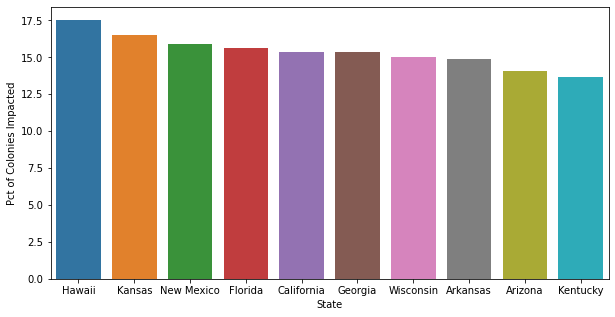

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(y="Pct of Colonies Impacted",x="State",data=top_states)

### Hawaii , Kansas , New Mexico ..etc are the states where bees are affected the most in past 5 years
### Intresting find : Most affected states are present in south and western part of USA. Northern part of USA is relatively in better shape. Supporting the theory that hot temparatures are more dangerous for bees.

### Lets try to analyze the data as per states in more detailed manner.
### We dig deep and analyze as per every quarter of year and each and every reason that has affected the bee colonies

Till now we know Varroa Mites is the most impactful reason on bees colonies especially in Months of Jul-Sep,Lets Dig Deeper with these factors!

## Pie chart for analysing the top states  affected by Varroa Mites in Period Jul-Sep

In [28]:
def pie_chart(data,yr,period,affect):
    vm=data[data['Affected by']==affect]
    vm[vm['Year']==yr]
    
    worst_affected=pd.DataFrame(vm.groupby(['Year','Period','State'])['Pct of Colonies Impacted'].mean().reset_index())
    worst_affected=worst_affected[worst_affected['Period']==period]
    worst_affected_yr=worst_affected[worst_affected['Year']==yr]
    worst_affected_yr=worst_affected_yr.sort_values('Pct of Colonies Impacted',ascending=False).head(10)
    
    plt.figure(figsize=(6,6))
    explode = (0.1, 0, 0, 0,0,0,0,0,0,0)
    plt.pie(x='Pct of Colonies Impacted',labels='State',data=worst_affected_yr,explode=explode,autopct='%1.1f%%')
    title="Year: "+str(yr)+"         "+"Period: "+period+"      "+"Affected By:"+affect
    plt.title(title)
    plt.show()

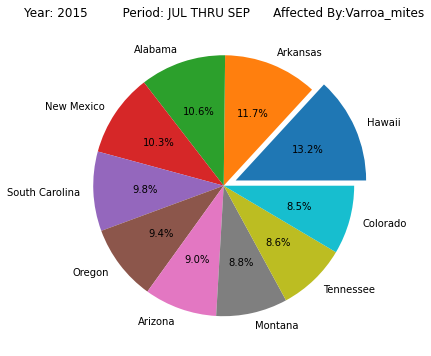

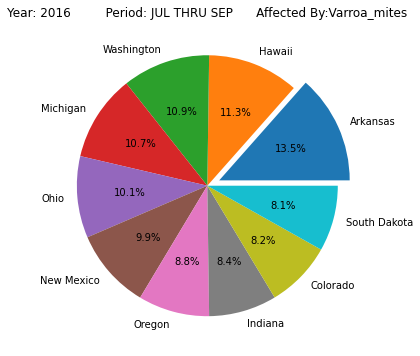

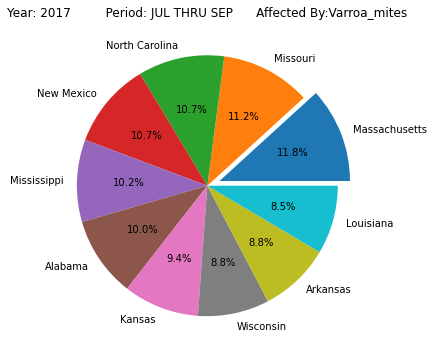

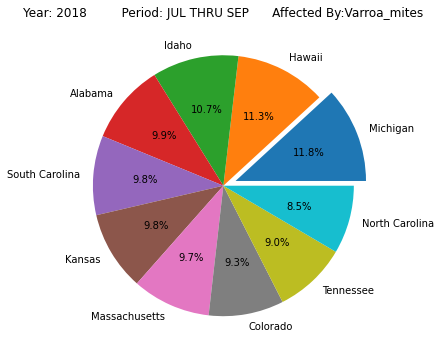

In [29]:
pie_chart(bees,2015,'JUL THRU SEP','Varroa_mites')
pie_chart(bees,2016,'JUL THRU SEP','Varroa_mites')
pie_chart(bees,2017,'JUL THRU SEP','Varroa_mites')
pie_chart(bees,2018,'JUL THRU SEP','Varroa_mites')

When we saw overall data we got states like Florida, Mexico, California, Georgia where impact on bees were high but when we are analyzing the data as per Varroa mites over the years in month of Jul-sep(deadliest conditions)- We can find states like North Carolina, South Carolina, Massachusetts,Colarado being affected under deadliest conditions but they weren't present in top-most affected states list.Therefore it is important we analysis the most impactful conditions properly.   

# 3) Affected By

In [30]:
# By now we know Varroa Mites are biggest threat to Bees

<AxesSubplot:xlabel='Affected by', ylabel='Pct of Colonies Impacted'>

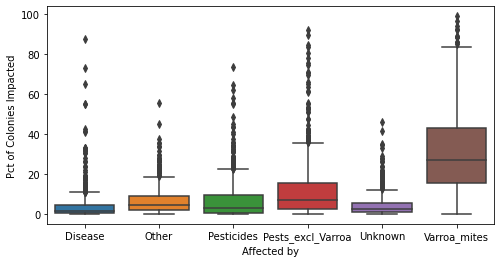

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(y='Pct of Colonies Impacted',x="Affected by",data=bees)
# Apart from Varroa mites ..pesticides have next big impact on bees

In [32]:
def top_states_affected_yr(data,yr):
    b=data.groupby(['Affected by','State','Year'])['Pct of Colonies Impacted'].max().reset_index()
    b=b[b['Year']==yr]
    u=b['Affected by'].unique()
    top_states=pd.DataFrame()
    for i in range(len(u)):
        w=b[b["Affected by"]==u[i]].sort_values('Pct of Colonies Impacted',ascending=False)[0:1]
        top_states=pd.concat([top_states,w])
    return top_states

In [33]:
top_states_yr=pd.concat([top_states_affected_yr(bees,2015),top_states_affected_yr(bees,2016),top_states_affected_yr(bees,2017),top_states_affected_yr(bees,2018)])

In [34]:
def top_states_affected(data,affect):
    a=data[data['Affected by']==affect]
    ax=sns.scatterplot(data=a,x="Year",y="Pct of Colonies Impacted",s=50,hue="State",legend=False)
    sns.lineplot(data=a,x="Year",y="Pct of Colonies Impacted",ax=ax)
    n=a['State'].values
    z=a['Year'].values
    y=a['Pct of Colonies Impacted'].values
    for i, txt in enumerate(n):
        plt.annotate(txt, (z[i], y[i]))
    plt.title("Affected by"+" "+affect)
    plt.xlim()
    plt.show()

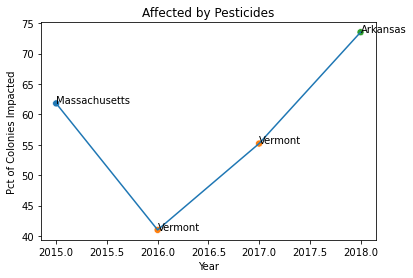

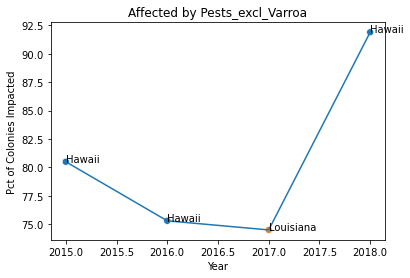

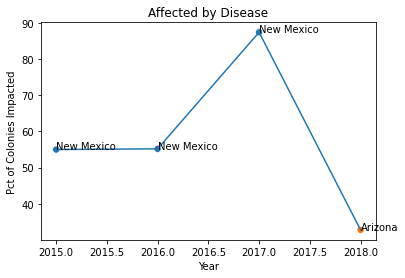

In [35]:
top_states_affected(top_states_yr,"Pesticides")
top_states_affected(top_states_yr,"Pests_excl_Varroa")
top_states_affected(top_states_yr,"Disease")

From the above graphs it is difficult to conclude anything. Although we can state few things we see:-
<li> Hawaii is being constantly affected the most by Pests. We also saw Varroa Mites affecting bee population in Hawaii which also a kind of Pest. Thus we can say Hawaii is one the worst places for bees in USA.
<li> Due to increase use of pesticides in past few years it's affect on bees has been mammoth.Almost 75% bees that died were due to Pesticides in Arkansas in 2018

# Lets analyze the outliers ...where colonies were impacted the most

In [36]:
# Outliers usually depict good insights of data

<AxesSubplot:xlabel='Pct of Colonies Impacted'>

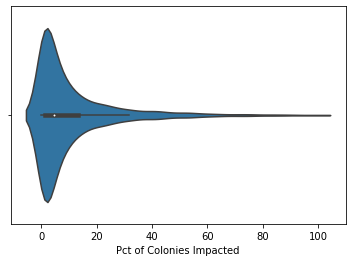

In [37]:
sns.violinplot(data=bees,x='Pct of Colonies Impacted')

In [38]:
top_pct_colonies_impacted=bees.sort_values('Pct of Colonies Impacted',ascending=False)[['Year','State','Pct of Colonies Impacted','Affected by','Period']]

In [39]:
top_pct_colonies_impacted=top_pct_colonies_impacted[top_pct_colonies_impacted['Year']!=2019]
top_pct_colonies_impacted=top_pct_colonies_impacted[top_pct_colonies_impacted['Pct of Colonies Impacted']>40.0]

<AxesSubplot:>

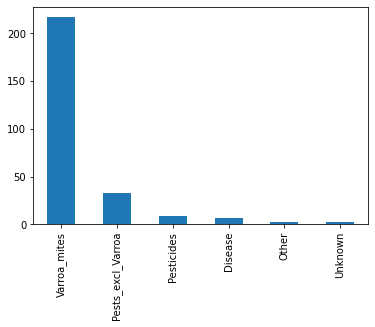

In [40]:
top_pct_colonies_impacted['Affected by'].value_counts().plot(kind='bar')

Lets see which state was affected the most in outliers.
Till now states like Hawaii,Arizona,Kansas,New Mexico

<AxesSubplot:>

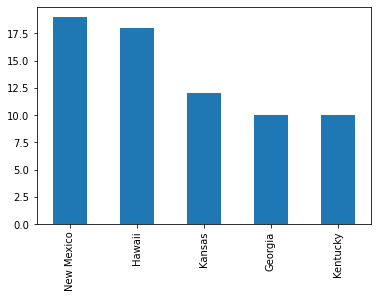

In [41]:
top_pct_colonies_impacted['State'].value_counts()[0:5].plot(kind='bar')

<AxesSubplot:>

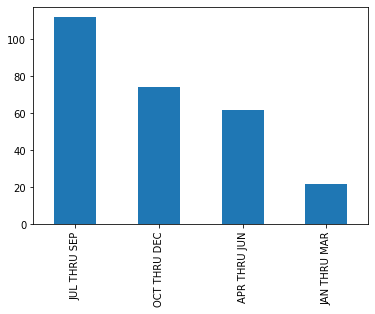

In [42]:
top_pct_colonies_impacted['Period'].value_counts().plot(kind='bar')

<AxesSubplot:>

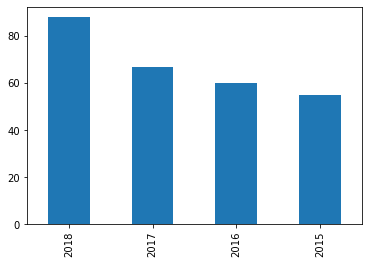

In [43]:
top_pct_colonies_impacted['Year'].value_counts().plot(kind='bar')

#### Key Take-aways from outliers 
<li> Varroa Mites had the most impacted on bees that too in big numbers.It was solley responsible for killing almost 95% bees is some cases</li>
<li> Hawaii,New Mexico,Kansas,Georgia,California appear the most in outliers data.It means whenever the bees were affected in high numbers by some reason they were mostly affected in these states. </li>
<li> Even though we declared Jul-Sep overall the deadliest month for bees,but in outliers we can see all the months here but in majority it is still dominated by Jul-Sep and oct-dec.</li>

#### Majority of outliers lie in 2018 thus indicating a clear spike in 2018.
####  Bee colonies were affected in big numbers in 2018.

# 2019 data analysis

We can analyze 2019 wrt to previous years for Jan-Mar Period

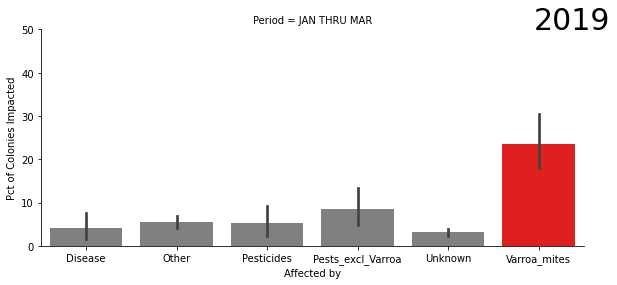

In [44]:
quarter_by_analysis(bees,2019,"Pct of Colonies Impacted","Affected by")

<Figure size 576x360 with 0 Axes>

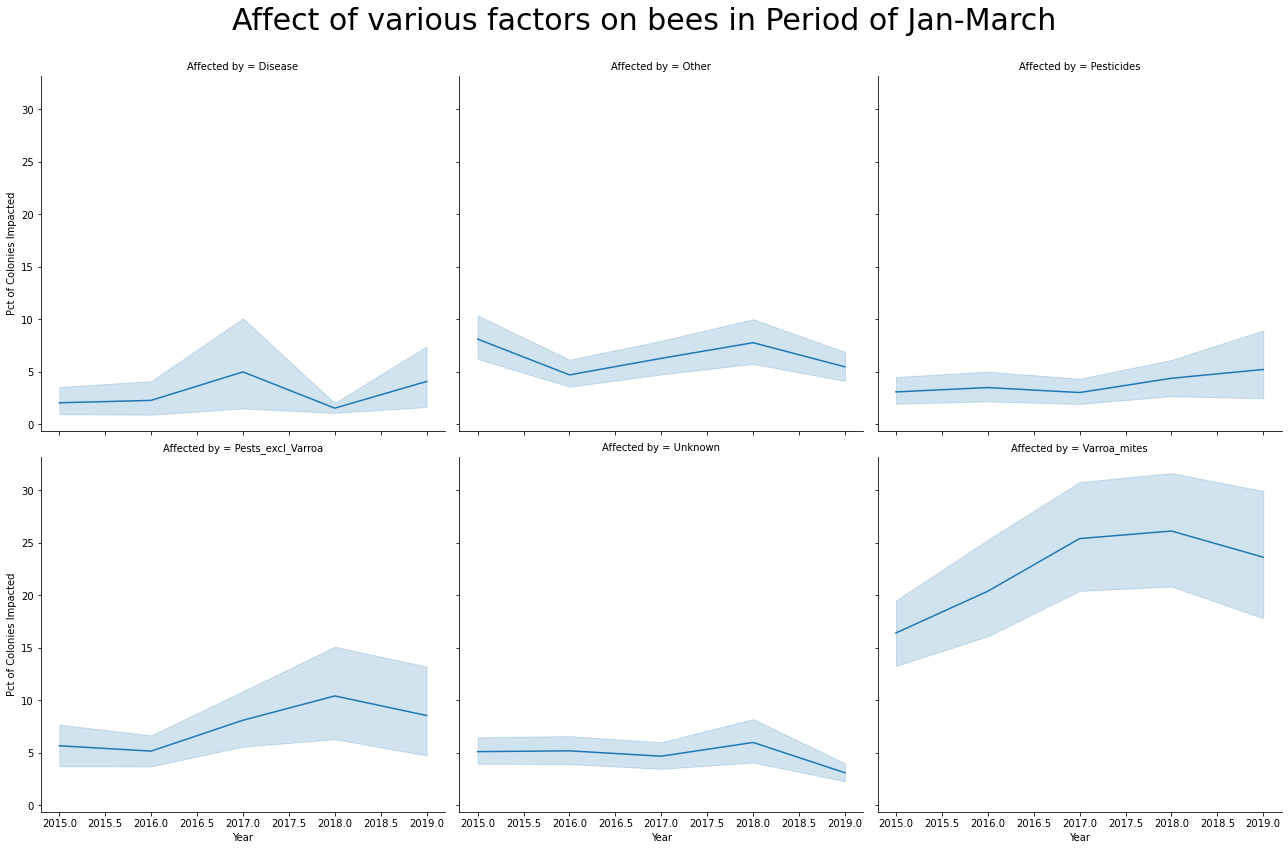

In [45]:
plt.figure(figsize=(8,5))
g=sns.FacetGrid(bees[bees.Period=='JAN THRU MAR'],col="Affected by",col_wrap=3,aspect=1,height=6) 
g.map_dataframe(sns.lineplot,"Year","Pct of Colonies Impacted")                     
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Affect of various factors on bees in Period of Jan-March",fontsize=30)
plt.show()

<b> Slight decline in majority of factors except Disease and Pesticides. Pesticides is a concerning issue on bees as it is directly caused by humans. Pesticides are so commonly being used nowadays that even the policies being introduced right now are not able to ban the use of it. It is high time to take strong measures. </b>

# <center>END</center>